# Effects of time and user information on trips duration

## Investigation Overview

In this investigation, I wanted to look at these features and see how it affect the trips duration. The main focus will be on the time information and the user information

## Dataset Overview

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The columns have information about trip duration, member information, time information, and station information.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# loading data
gobike = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# Drop the rows that contain missing values 
gobike.dropna(inplace = True)

# check
gobike.isnull().sum().sum()

0

In [4]:
# drop columns that has member_gender == 'Other'
gobike = gobike[gobike.member_gender != 'Other']
# check
gobike.member_gender.unique()

array(['Male', 'Female'], dtype=object)

In [5]:
# Calculating members age. This data is from 2019, so I will calculate the age based on that year.
gobike['member_age'] = 2019 - gobike['member_birth_year']

In [7]:
# Correcting data types format

# converting start_time and end_time into DateTime.
gobike.start_time = pd.to_datetime(gobike['start_time'])
gobike.end_time = pd.to_datetime(gobike['end_time'])

# converting user_type and member_gender into category
gobike.user_type = gobike.user_type.astype('category')
gobike.member_gender = gobike.member_gender.astype('category')

In [8]:
# get start hour, start day, start month columns 
gobike['start_timeofday'] = gobike.start_time.dt.strftime('%H')
gobike['start_dayofweek'] = gobike.start_time.dt.strftime('%A')
gobike['start_month'] = gobike.start_time.dt.strftime('%B')

In [9]:
# Converting duration by seconds into duration by minutes.
gobike['duration_minute'] = gobike['duration_sec']/60 
# continuous variable

In [12]:
# Putting the columns that we are interested in in a single DataFrame.
gobike_targeted = gobike[['start_timeofday', 'start_dayofweek', 'start_month'
                          , 'member_gender', 'member_age', 'user_type', 'bike_share_for_all_trip', 'duration_minute']]

## Trips Duration Distribution
Most trips take less than 30 minutes. 

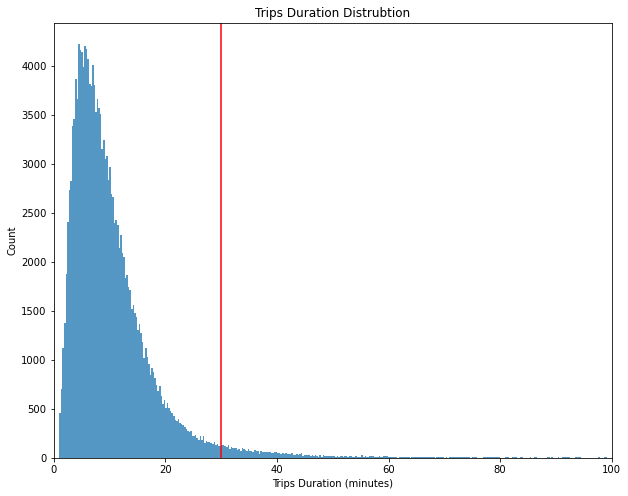

In [26]:
# Distribution of duration in minute 
plt.figure(figsize = [10, 8])

sb.histplot(data = gobike_targeted, x = 'duration_minute')

plt.xlabel('Trips Duration (minutes)')
plt.xlim((0, 100))
plt.axvline(x = 30, color = 'r');
plt.title('Trips Duration Distrubtion');

In [19]:
# function to plot the distribution of categorical variable 
# since the countplot function show the counts of observations in each categorical bin using bars.
def countplot_ratio(x = None, data = None, hue = None, ax = None, order = None, autopct = None, color = None):
    # plot the variable
    ax = sb.countplot(x = x, data = data, hue = hue, ax = ax, color = color, order = order)
    # names of x labels
    ax.set_xticklabels(ax.get_xticklabels())
    # plot title
    ax.set_title(x + " Distribution")
    # total number of data which used to get the proportion
    total = float(len(data))
    # if autopct equal to True, It will show the proportions of the data
    if autopct == True:
        # for loop to iterate on the patches
        for patch in ax.patches:
            # get the height of the patch which represents the number of observations.
            height = patch.get_height()
            # Put text on each patch with the proportion of the observations
            ax.text(patch.get_x()+patch.get_width()/2,height+4,'{:.2f}%'.format((height/total)*100),weight = 'bold',
                fontsize = 12,ha = 'center')

In [20]:
# convert start_timeofday, start_dayofweek, and start_month into ordered categorical types
time_units = {'start_timeofday':['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
        '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
             ,'start_dayofweek':['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
             ,'start_month':['January', 'February', 'March', 'April', 'May', 'June',
                     'July', 'August', 'September', 'October', 'November', 'December']}
for unit in time_units:
    ordered_unit = pd.api.types.CategoricalDtype(categories=time_units[unit], ordered=True)
    gobike_targeted[unit] = gobike_targeted[unit].astype(ordered_unit)

## Start Trips Time of Day Distribution
We can see that most trips are from 8 am - 9 am and 5 pm - 6 pm. I think this is related to the time when people go to work and when they back home.

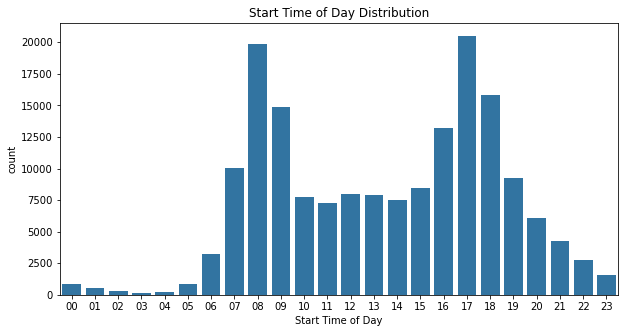

In [24]:
# start_timeofday distribution
base_color = sb.color_palette()[0]
plt.figure(figsize = [10, 5])
countplot_ratio(x = 'start_timeofday', data = gobike_targeted, color = base_color);
plt.xlabel('Start Time of Day')
plt.title('Start Time of Day Distribution');

## Start Day of Week Distribution
The number of trips increases gradually until it reaches the maximum on Thursday, then it decreases until it reaches the minimum on Saturday and Sunday. Saturday and Sunday are the weekends in the United States of America. This supports the fact that the number of trips increases on the workdays and decreases on the weekend.

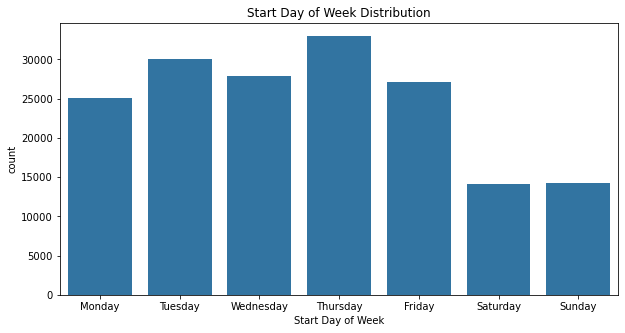

In [27]:
# start_dayofweek distribution
plt.figure(figsize = [10, 5])
countplot_ratio(x = 'start_dayofweek', data = gobike_targeted, color = base_color);
plt.xlabel('Start Day of Week')
plt.title('Start Day of Week Distribution');

In [31]:
gobike_targeted = gobike_targeted[gobike_targeted.duration_minute <= 60]
gobike_targeted = gobike_targeted[gobike_targeted.member_age <= 80]

## Duration Distribution Over Day of Week
The duration on Saturday and Sunday is greater than the rest of the days. I think people on weekends used bikes for entertainment.

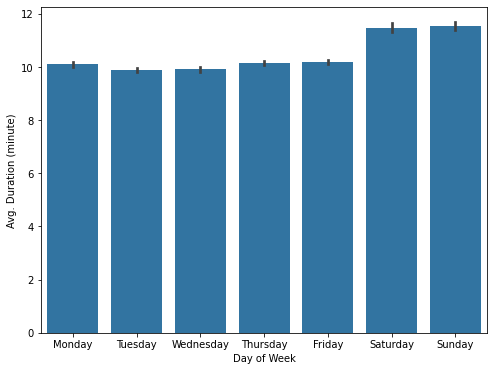

In [32]:
plt.figure(figsize = [8, 6])
base_color = sb.color_palette()[0]
sb.barplot(data = gobike_targeted, x = 'start_dayofweek', y = 'duration_minute', color = base_color)
plt.ylabel('Avg. Duration (minute)')
plt.xlabel('Day of Week');

## Duration Distribution by Gender
The trip duration for females is greater than for males, but the difference is very tiny.

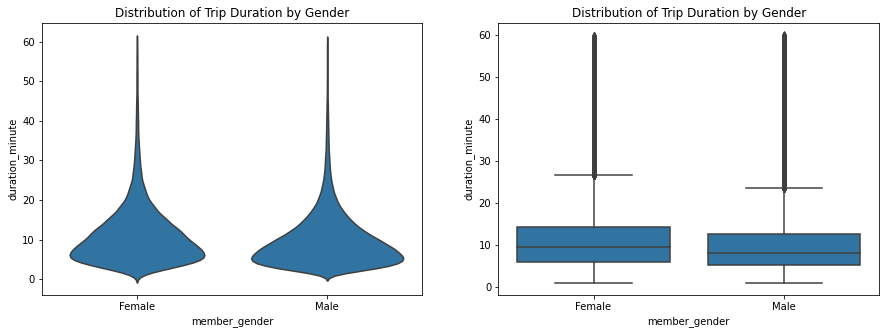

In [33]:
plt.figure(figsize = [15, 5])
plt.subplot(1, 2, 1)
sb.violinplot(data = gobike_targeted, x = 'member_gender', y = 'duration_minute', inner = None, color = base_color)
plt.title('Distribution of Trip Duration by Gender')
plt.subplot(1, 2, 2)
sb.boxplot(data = gobike_targeted, x = 'member_gender', y = 'duration_minute', color = base_color)
plt.title('Distribution of Trip Duration by Gender');

## Duration vs. Age 
The relationship between trip duration and members' age is negative. And this makes sense since older members can't ride for a long time.

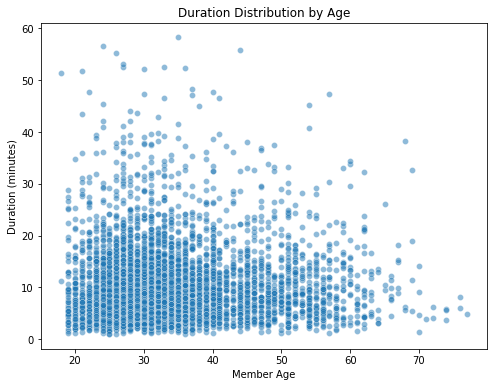

In [40]:
gobike_sample = gobike_targeted.sample(5000, replace = False)
plt.figure(figsize = [8, 6])
sb.scatterplot(data = gobike_sample, x = 'member_age', y = 'duration_minute', alpha = 0.5);
plt.xlabel('Member Age')
plt.ylabel('Duration (minutes)')
plt.title('Duration Distribution by Age');

## Duration by User Type
Customers go on trips longer in duration than subscribers. The number of subscribers who go on less than 10-minute trips is greater than the number of customers who do so.

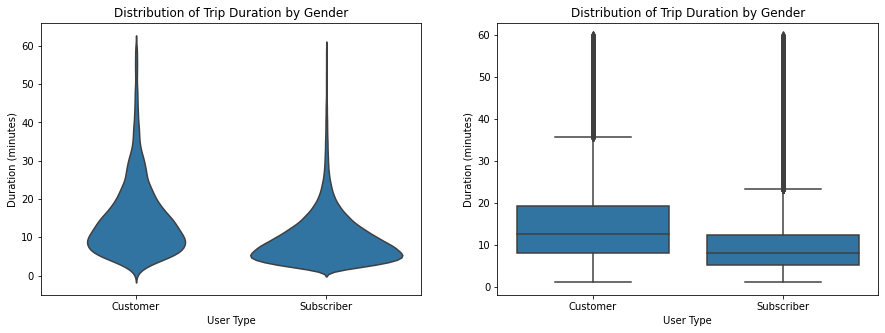

In [42]:
plt.figure(figsize = [15, 5])
plt.subplot(1, 2, 1)
sb.violinplot(data = gobike_targeted, x = 'user_type', y = 'duration_minute', inner = None, color = base_color)
plt.title('Distribution of Trip Duration by Gender')
plt.xlabel('User Type')
plt.ylabel('Duration (minutes)')

plt.subplot(1, 2, 2)
sb.boxplot(data = gobike_targeted, x = 'user_type', y = 'duration_minute', color = base_color)
plt.title('Distribution of Trip Duration by Gender');
plt.xlabel('User Type')
plt.ylabel('Duration (minutes)');

## User Type vs. Gender
69.72 % of users are subscribers and males.

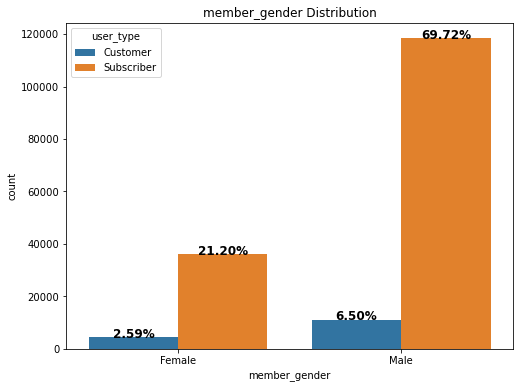

In [43]:
plt.figure(figsize = [8, 6])
countplot_ratio(data = gobike_targeted, x = 'member_gender', hue = 'user_type', autopct = True)

## Start Time of Day vs. User Type
Now, we can see that people who ride bikes at 8 am-9 am or 5 pm-6 pm are subscribers. This is related to the time when people go to work or study. Those people are subscribers.

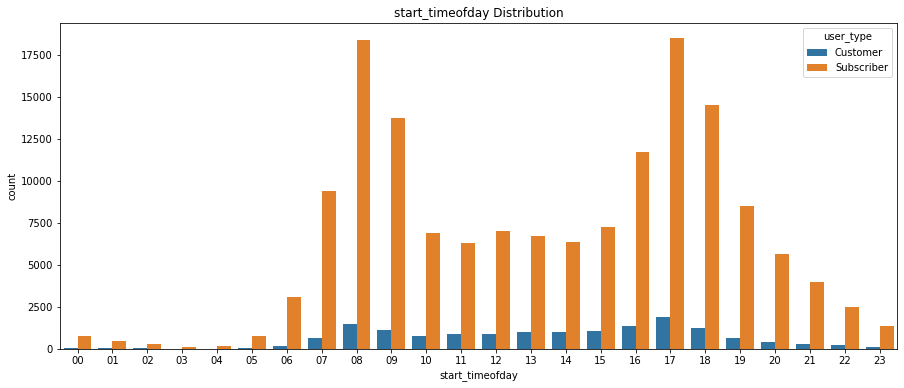

In [46]:
plt.figure(figsize = [15, 6])
countplot_ratio(data = gobike_targeted, x = 'start_timeofday', hue = 'user_type')

## Start Day of Week vs. User Type
This graph emphasizes that people who go to work or study are subscribers since, on the weekdays, the number of subscribers is greater than on the weekends.

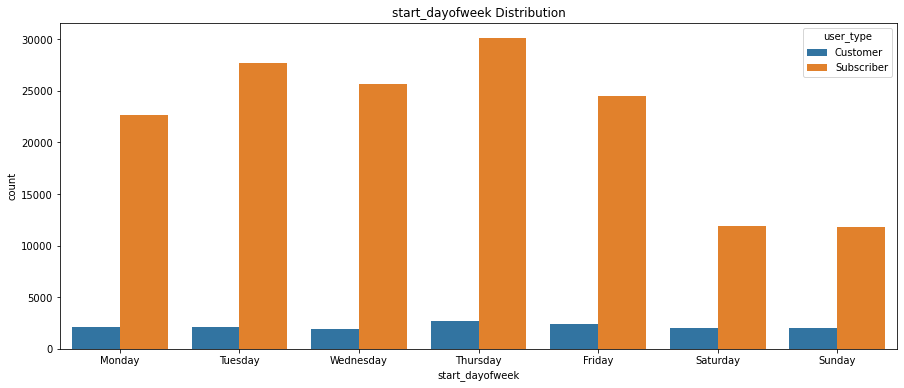

In [47]:
plt.figure(figsize = [15, 6])
countplot_ratio(data = gobike_targeted, x = 'start_dayofweek', hue = 'user_type')

## Duration by User Type and Start Time of Day
Customers go on consistently long trips duration than subscribers at all times during the day. Customers' trips are long at midnight, and especially at midday.

Text(0.5, 1.0, 'Duration Distribution by User Type and Time of Day')

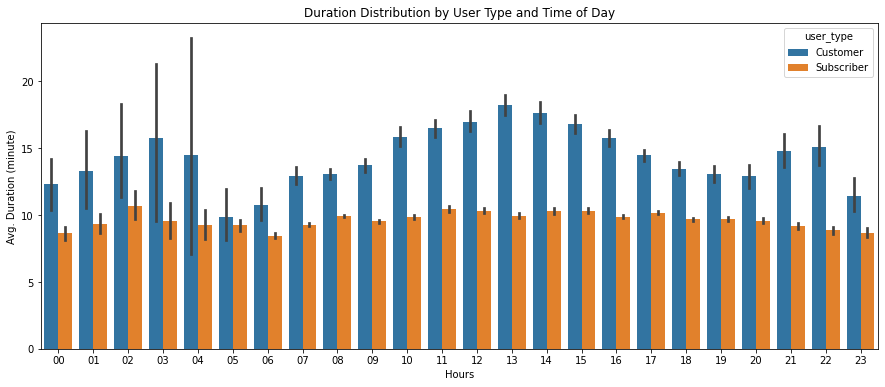

In [82]:
# Distribution of duration over times of the day
plt.figure(figsize = [15, 6])
sb.barplot(data = gobike_targeted, x = 'start_timeofday', y = 'duration_minute', hue = 'user_type')
plt.ylabel('Avg. Duration (minute)')
plt.xlabel('Hours');
plt.title('Duration Distribution by User Type and Time of Day')

## Duration by User Type and Days of the Week
The trips duration for subscribers is consistent across all the days of the week whereas, the trip's duration increases for customers on the weekends.

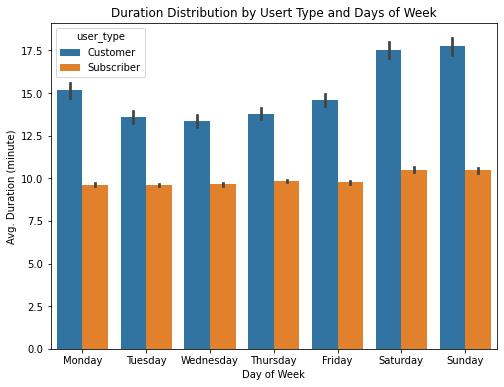

In [79]:
# Distribution of duration over days of the week
plt.figure(figsize = [8, 6])
sb.barplot(data = gobike_targeted, x = 'start_dayofweek', y = 'duration_minute', hue = 'user_type')
plt.ylabel('Avg. Duration (minute)')
plt.xlabel('Day of Week')
plt.title('Duration Distribution by Usert Type and Days of Week');

## Duration by Gender and User Type
Whether females are subscribers or customers, they go on long-duration trips than males.

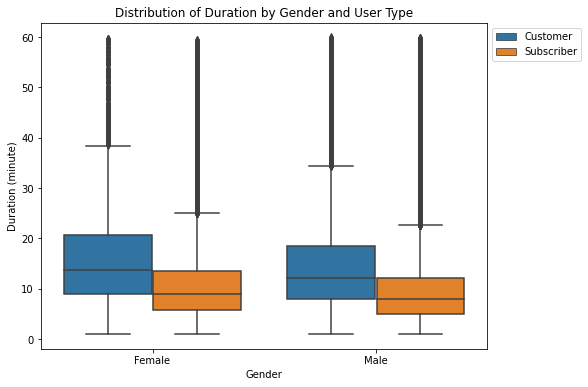

In [81]:
# Distribution of duration vs gender and user type 
plt.figure(figsize = [8, 6])
sb.boxplot(data = gobike_targeted, x = 'member_gender', y = 'duration_minute', hue = 'user_type')
plt.ylabel('Duration (minute)')
plt.xlabel('Gender');
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.title('Distribution of Duration by Gender and User Type');

## Age by User Type and Gender
Now, we can see the reason why females go on longer duration trips than males. This is because females are younger than males, and we saw before that the relationship between duration and ages is negative.
\
The median ages for females, and males whether they are customers, or subscribers are consistent.

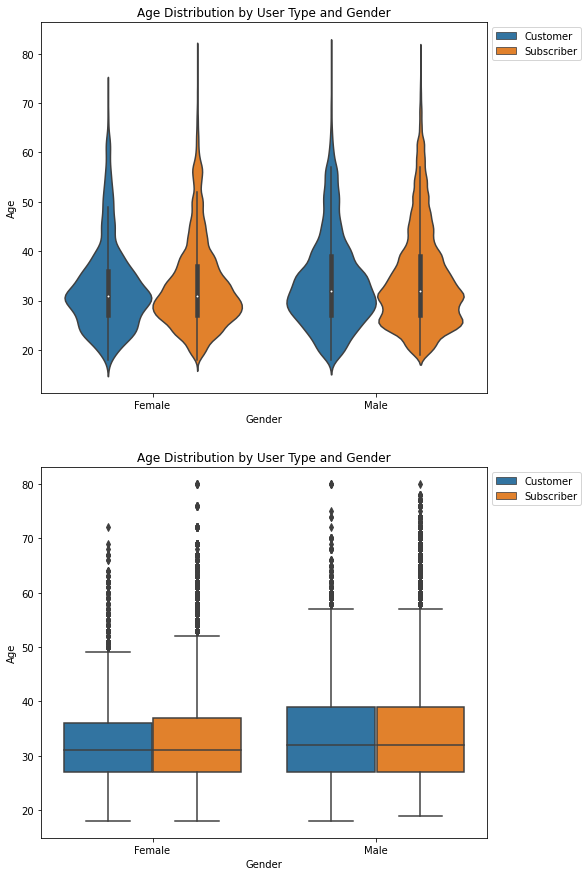

In [85]:
# Distribution of age vs. gender user type

plt.figure(figsize = [8, 15])
plt.subplot(2, 1, 1)
sb.violinplot(data = gobike_targeted, x = 'member_gender', y = 'member_age', hue = 'user_type')
plt.ylabel('Age')
plt.xlabel('Gender');
plt.legend(bbox_to_anchor=(1, 1), loc='upper left');
plt.title('Age Distribution by User Type and Gender');

plt.subplot(2, 1, 2)
sb.boxplot(data = gobike_targeted, x = 'member_gender', y = 'member_age', hue = 'user_type')
plt.ylabel('Age')
plt.xlabel('Gender');
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.title('Age Distribution by User Type and Gender');